# Pokemon Machine Learning Classification Model
by Yonathan Elia Munthe; last updated : 2020-03-05

# Contents :
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation

*Deployment

6. More Insights
7. Conclusion
8. Future Improvement

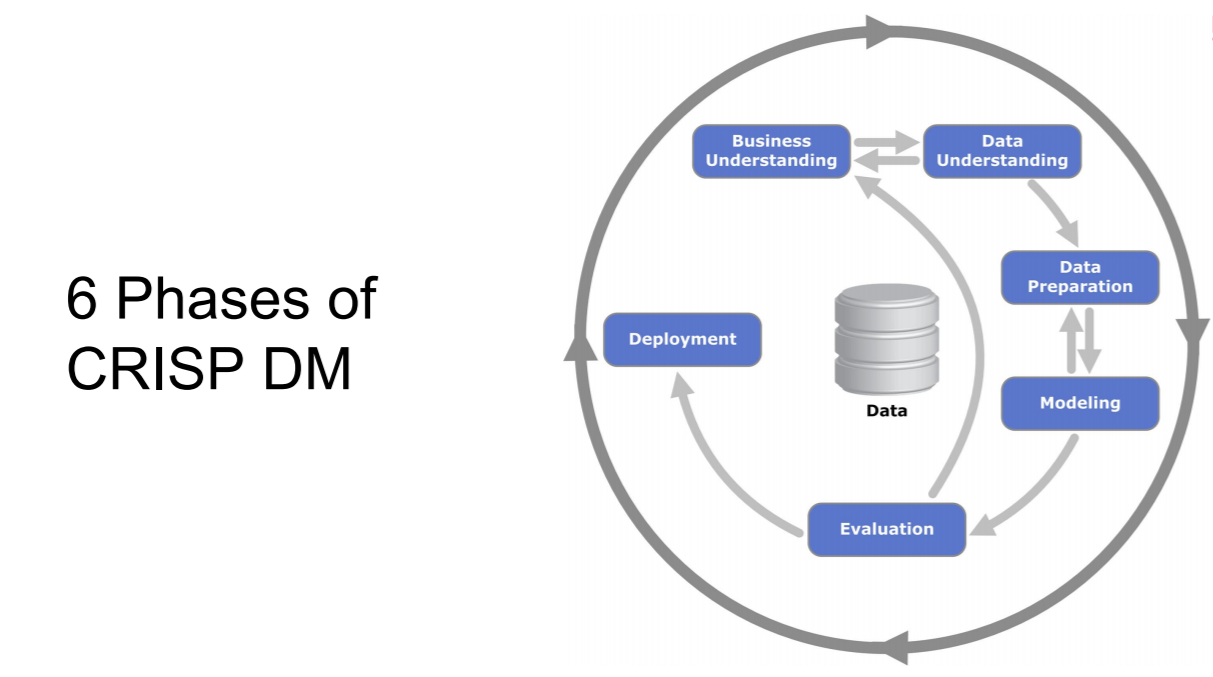

In [51]:
from IPython.display import Image
Image(filename="CRISP DM.png") 

##### Cross Industry Standard Process for Data Mining

## 1. Business Understanding

### Why Pokemon Dataset?
1. Perusahaan masih dalam tahap **pengembangan infrastruktur IT dan database**
2. **Data masih terpencar-pencar** di masing-masing orang dan divisi, data gathering lama, sulit mencari dataset di luar transaksi tol yang relevan
3. Pokemon **relates** dengan banyak orang, hampir semua orang tahu Pokemon

### Machine Learning Classification
Machine Learning Classification merupakan Machine Learning tipe Supervised Machine Learning, dengan dataset yang berlabel. Contoh Use Case / Problem Machine Learning Classification, antara lain :
1. Survival Analysis (Titanic)
2. Bank Customer Default
3. Credit Approval
4. Fraud Detection
5. Screening New Job Candidates
6. Employee Churn
7. Spam Email Detection

#### The Pokemon Dataset
Source : https://www.kaggle.com/abcsds/pokemon

This data set includes 800 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.
The data as described by Myles O'Neill is:

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

The data for this table has been acquired from several different sites, including:

- pokemon.com
- pokemondb
- bulbapedia

One question has been answered with this database: **The type of a pokemon cannot be inferred only by it's Attack and Defense.** It would be worthy to find which **two variables can define the type of a pokemon, if any**. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.

### *Goal / Obj : Prediksi klasifikasi Type Pokemon berdasarkan status Pokemon tersebut*

## 2. Data Understanding
### 2.a. Import Libraries

In [52]:
import numpy as np
import pylab
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import missingno as msno
%matplotlib inline

### 2.b. Load Data and Summarize Data

In [53]:
rawdata = pd.read_csv("Pokemon.csv")

In [54]:
rawdata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [55]:
rawdata.columns # list all columns in the dataset

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [56]:
rawdata.shape # Dataset size

(800, 13)

In [57]:
len(rawdata)

800

In [58]:
rawdata.dtypes # Each column / feature data type

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [59]:
rawdata.describe() # Statistical measures for integer columns / features

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### 2.c. Plot Missing Data
After we load and summarize our data, we can start plotting the missing data from our data set. The four most common methods of handling missing data :
1. Drop the observation (row)
2. Drop the feature (column)
3. Impute the missing data (with mean / median / mode of the feature)
4. Replace the missing data (with "Undefined" - or any text - for categorical, -999 for numerical)

sumber : https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

In [60]:
rawdata.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [61]:
rawdata.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [62]:
for col in rawdata.columns:
    pct_missing = np.mean(rawdata[col].isnull())
    print("{} - {}%".format(col, round(pct_missing*100)))

# - 0.0%
Name - 0.0%
Type 1 - 0.0%
Type 2 - 48.0%
Total - 0.0%
HP - 0.0%
Attack - 0.0%
Defense - 0.0%
Sp. Atk - 0.0%
Sp. Def - 0.0%
Speed - 0.0%
Generation - 0.0%
Legendary - 0.0%


#### Plot missing data using missingno library

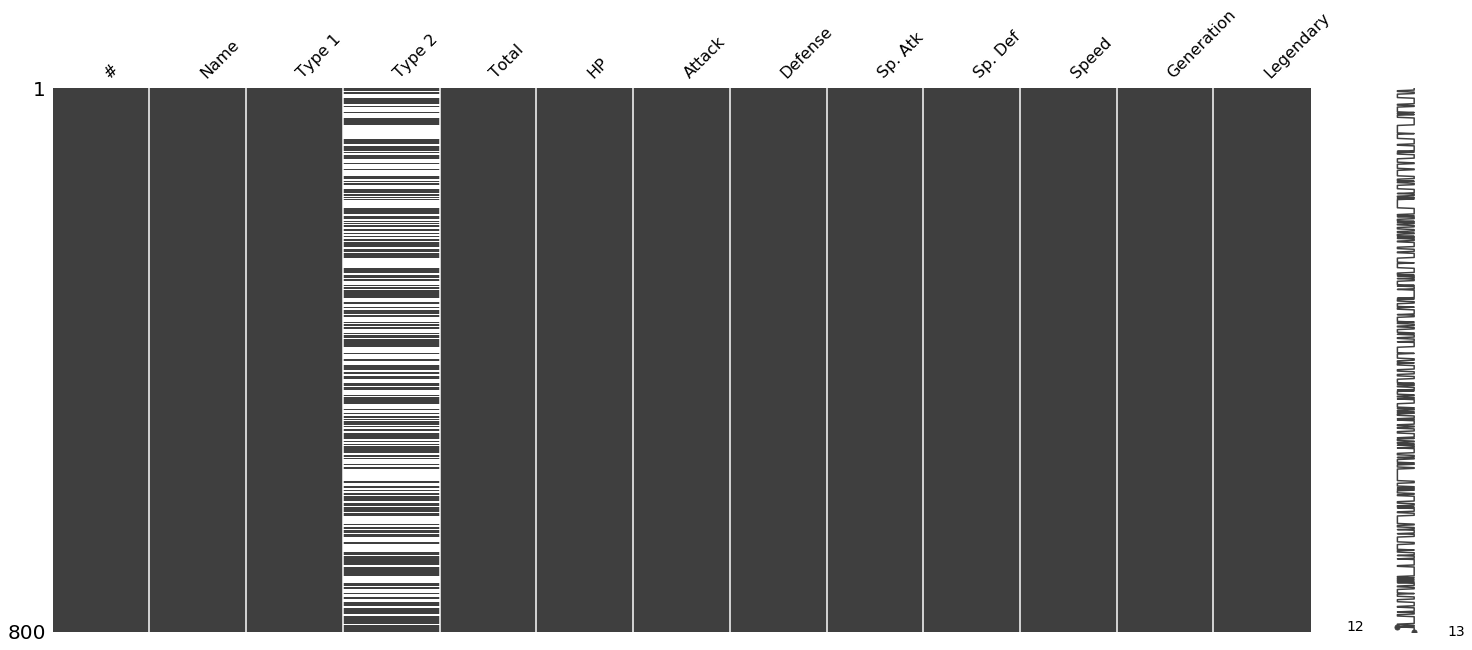

In [63]:
msno.matrix(rawdata)

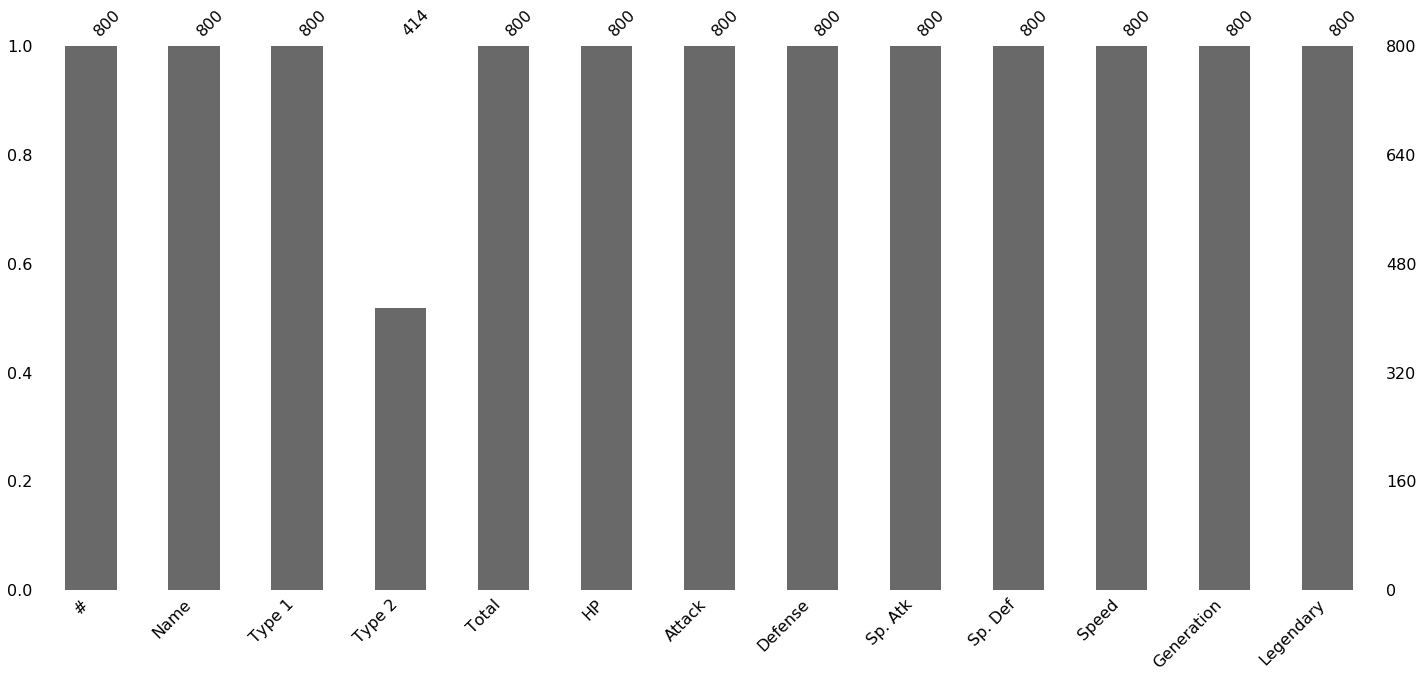

In [64]:
msno.bar(rawdata)

### 2.d. Outliers
Outliers are data that is distinctively different from other observations. They could be real outliers or mistakes.

The methods of handling outliers are somewhat similar to missing data. We either drop or adjust or keep them. We can refer back to the missing data section for possible solutions.

Two methods to help detect outliers :
1. Boxplot
2. Descriptive Statistics

#### 2.d.1. Boxplot

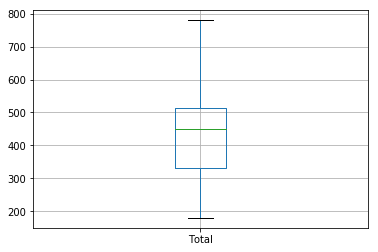

In [65]:
rawdata.boxplot(column=["Total"])
#rawdata.boxplot(column=["HP"])
#rawdata.boxplot(column=["Attack"])
#rawdata.boxplot(column=["Defense"])
#rawdata.boxplot(column=["Sp. Atk"])
#rawdata.boxplot(column=["Sp. Def"])
#rawdata.boxplot(column=["Speed"])

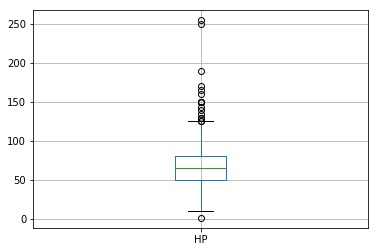

In [66]:
#rawdata.boxplot(column=["Total"])
rawdata.boxplot(column=["HP"])
#rawdata.boxplot(column=["Attack"])
#rawdata.boxplot(column=["Defense"])
#rawdata.boxplot(column=["Sp. Atk"])
#rawdata.boxplot(column=["Sp. Def"])
#rawdata.boxplot(column=["Speed"])

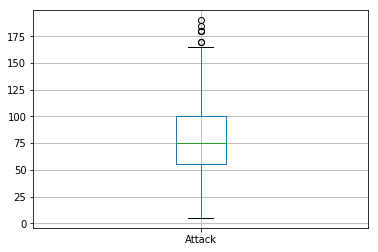

In [67]:
#rawdata.boxplot(column=["Total"])
#rawdata.boxplot(column=["HP"])
rawdata.boxplot(column=["Attack"])
#rawdata.boxplot(column=["Defense"])
#rawdata.boxplot(column=["Sp. Atk"])
#rawdata.boxplot(column=["Sp. Def"])
#rawdata.boxplot(column=["Speed"])

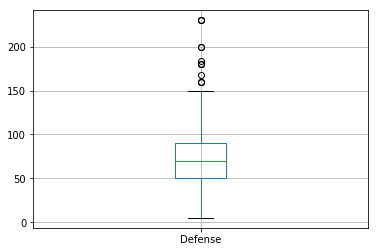

In [68]:
#rawdata.boxplot(column=["Total"])
#rawdata.boxplot(column=["HP"])
#rawdata.boxplot(column=["Attack"])
rawdata.boxplot(column=["Defense"])
#rawdata.boxplot(column=["Sp. Atk"])
#rawdata.boxplot(column=["Sp. Def"])
#rawdata.boxplot(column=["Speed"])

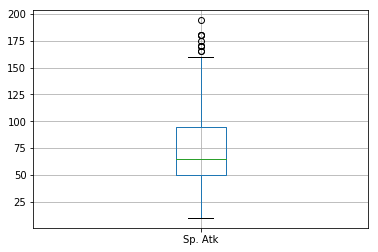

In [69]:
#rawdata.boxplot(column=["Total"])
#rawdata.boxplot(column=["HP"])
#rawdata.boxplot(column=["Attack"])
#rawdata.boxplot(column=["Defense"])
rawdata.boxplot(column=["Sp. Atk"])
#rawdata.boxplot(column=["Sp. Def"])
#rawdata.boxplot(column=["Speed"])

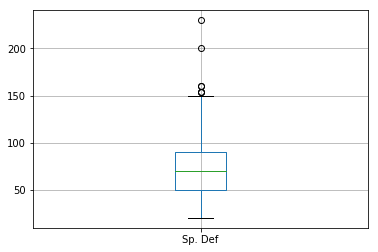

In [70]:
#rawdata.boxplot(column=["Total"])
#rawdata.boxplot(column=["HP"])
#rawdata.boxplot(column=["Attack"])
#rawdata.boxplot(column=["Defense"])
#rawdata.boxplot(column=["Sp. Atk"])
rawdata.boxplot(column=["Sp. Def"])
#rawdata.boxplot(column=["Speed"])

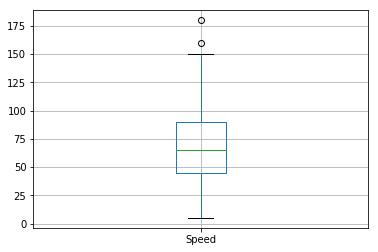

In [71]:
#rawdata.boxplot(column=["Total"])
#rawdata.boxplot(column=["HP"])
#rawdata.boxplot(column=["Attack"])
#rawdata.boxplot(column=["Defense"])
#rawdata.boxplot(column=["Sp. Atk"])
#rawdata.boxplot(column=["Sp. Def"])
rawdata.boxplot(column=["Speed"])

In [72]:
rawdata[
    (rawdata["HP"] > 125) |
    (rawdata["HP"] < 5) |
    (rawdata["Attack"] > 165) |
    (rawdata["Defense"] > 150) |
    (rawdata["Sp. Atk"] > 160) |
    (rawdata["Sp. Def"] > 150) |
    (rawdata["Speed"] > 150)
        ].sort_values(by=["Total"])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
350,320,Wailmer,Water,NaN,400,130,70,35,70,35,60,3,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False


In [73]:
rawdata[
    (rawdata["HP"] > 125) |
    (rawdata["HP"] < 5) |
    (rawdata["Attack"] > 165) |
    (rawdata["Defense"] > 150) |
    (rawdata["Sp. Atk"] > 160) |
    (rawdata["Sp. Def"] > 150) |
    (rawdata["Speed"] > 150)
        ].sort_values(by=["Total"]).shape

(52, 13)

In [74]:
len(rawdata[
    (rawdata["HP"] > 125) |
    (rawdata["HP"] < 5) |
    (rawdata["Attack"] > 165) |
    (rawdata["Defense"] > 150) |
    (rawdata["Sp. Atk"] > 160) |
    (rawdata["Sp. Def"] > 150) |
    (rawdata["Speed"] > 150)
        ].sort_values(by=["Total"]))

52

In [75]:
len1 = len(rawdata)
len2 = len(rawdata[
        (rawdata["HP"] > 125) |
        (rawdata["HP"] < 5) |
        (rawdata["Attack"] > 165) |
        (rawdata["Defense"] > 150) |
        (rawdata["Sp. Atk"] > 160) |
        (rawdata["Sp. Def"] > 150) |
        (rawdata["Speed"] > 150)
            ].sort_values(by=["Total"]))
print("Jumlah row / obv Rawdata : ", len1)
print("Jumlah row / obv Outliers: ", len2)
print("Percentage : ", len2/len1*100, "%")

Jumlah row / obv Rawdata :  800
Jumlah row / obv Outliers:  52
Percentage :  6.5 %


#### 2.d.2. Descriptive Statistics

In [76]:
rawdata.describe() # Statistical measures for integer columns / features

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### 2.e. Exploratory Data Analysis (EDA)

#### 2.e.1. Variation WITHIN Each Variable

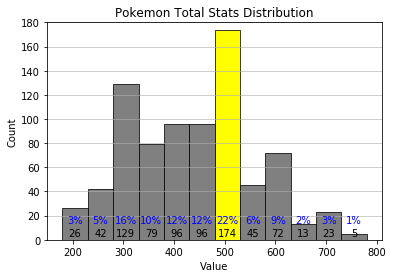

Maximum Count :  174.0


In [77]:
# Histogram (Count)
# An "interface" to matplotlib.axes.Axes.hist() method
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(x=rawdata["Total"], density = False, bins = 12, color = "grey",
                                edgecolor='black', linewidth=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Pokemon Total Stats Distribution')
maxfreq = counts.max()

# Set a clean upper y-axis limit
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Set a different color to the highest bar
patches[6].set_fc("yellow")

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, 12), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, 25), textcoords='offset points', va='top', ha='center', color = "blue")
    
plt.show()
print("Maximum Count : ", maxfreq)

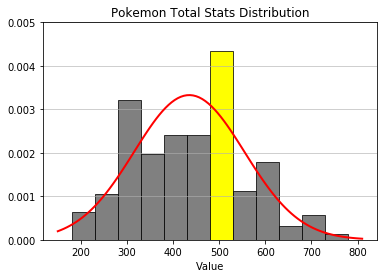

In [78]:
# Histogram + Normal Distribution Curve (Probability Density Function)
# An "interface" to matplotlib.axes.Axes.hist() method
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(x=rawdata["Total"], density = True, bins = 12, color= "grey",
                                edgecolor='black', linewidth=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
# plt.ylabel('Probability')
plt.title('Pokemon Total Stats Distribution')
maxfreq = counts.max()

# Set a clean upper y-axis limit
plt.ylim(ymax=np.ceil(maxfreq / 0.0010) * 0.0010 if maxfreq % 0.0010 else maxfreq + 0.001)

# Set a different color to the highest bar
patches[6].set_fc("yellow")

# Fit a normal distribution to the data
mu, std = norm.fit(rawdata["Total"])

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', color = "red", linewidth=2)

plt.show()

#### 2.e.2. Co-Variation BETWEEN Two Variable (Scatter Plot)

Text(0,0.5,'Special Defense')

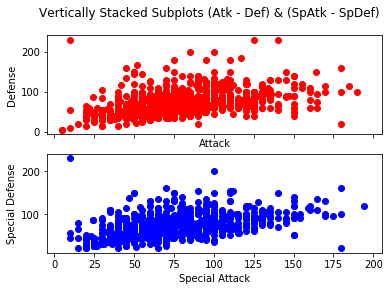

In [79]:
fig, axs = plt.subplots(2, sharex=True, sharey=False)
fig.suptitle('Vertically Stacked Subplots (Atk - Def) & (SpAtk - SpDef)')

Atk = rawdata["Attack"]
Def = rawdata["Defense"]
SpAtk = rawdata["Sp. Atk"]
SpDef = rawdata["Sp. Def"]

axs[0].scatter(Atk, Def, color = "red")
axs[0].set_xlabel('Attack')
axs[0].set_ylabel('Defense')

axs[1].scatter(SpAtk, SpDef, color = "blue")
axs[1].set_xlabel('Special Attack')
axs[1].set_ylabel('Special Defense')

Text(0,0.5,'Special Defense')

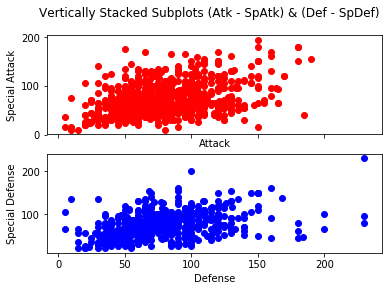

In [80]:
fig, axs = plt.subplots(2, sharex=True, sharey=False)
fig.suptitle('Vertically Stacked Subplots (Atk - SpAtk) & (Def - SpDef)')

HP = rawdata["HP"]
Atk = rawdata["Attack"]
Def = rawdata["Defense"]
SpAtk = rawdata["Sp. Atk"]
SpDef = rawdata["Sp. Def"]

axs[0].scatter(Atk, SpAtk, color = "red")
axs[0].set_xlabel('Attack')
axs[0].set_ylabel('Special Attack')

axs[1].scatter(Def, SpDef, color = "blue")
axs[1].set_xlabel('Defense')
axs[1].set_ylabel('Special Defense')

Text(0,0.5,'Special Defense')

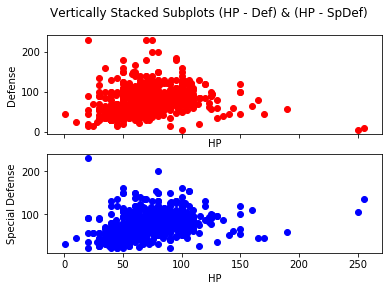

In [81]:
fig, axs = plt.subplots(2, sharex=True, sharey=False)
fig.suptitle('Vertically Stacked Subplots (HP - Def) & (HP - SpDef)')

HP = rawdata["HP"]
Atk = rawdata["Attack"]
Def = rawdata["Defense"]
SpAtk = rawdata["Sp. Atk"]
SpDef = rawdata["Sp. Def"]

axs[0].scatter(HP, Def, color = "red")
axs[0].set_xlabel('HP')
axs[0].set_ylabel('Defense')

axs[1].scatter(HP, SpDef, color = "blue")
axs[1].set_xlabel('HP')
axs[1].set_ylabel('Special Defense')

## 3. Data Preparation
### 3.a. Data Cleansing and Formatting
We clean and format the dataset by taking out **missing data**, **unnecessary features** and **outliers**.

#### 3.a.1. Selecting needed features
1. There is missing data in **Type 2** column and we are going to use **Type 1 only as the label**
2. We also drop **index (#), Name of the Pokemon, Generation** and **Legendary** as we don't need them
3. **Total** is the sum of other stats, we might drop this feature as well

In [82]:
data = rawdata.drop(["Type 2", "#", "Name", "Generation", "Legendary", "Total"], axis = 1)

In [83]:
data.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Fire,39,52,43,60,50,65


In [84]:
data.columns

Index(['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [85]:
# rename columns with spaces to make coding easier
data.rename(columns={"Type 1":"Type1", "Attack":"Atk", "Defense":"Def", "Sp. Atk":"SpAtk", "Sp. Def":"SpDef"}, inplace=True)

In [86]:
data.columns

Index(['Type1', 'HP', 'Atk', 'Def', 'SpAtk', 'SpDef', 'Speed'], dtype='object')

In [87]:
data.head()

,Type1,HP,Atk,Def,SpAtk,SpDef,Speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Fire,39,52,43,60,50,65


In [88]:
data.shape # Dataset size

(800, 7)

In [89]:
data.dtypes # Each column / feature data type

Type1    object
HP        int64
Atk       int64
Def       int64
SpAtk     int64
SpDef     int64
Speed     int64
dtype: object

#### 3.a.2. Remove Outliers

In [90]:
# Outliers
data[
    (data["HP"] > 125) |
    (data["HP"] < 5) |
    (data["Atk"] > 165) |
    (data["Def"] > 150) |
    (data["SpAtk"] > 160) |
    (data["SpDef"] > 150) |
    (data["Speed"] > 150)
        ].shape

(52, 7)

In [91]:
# Data without Outliers
data_wo = data[
        (data["HP"] <= 125) &
        (data["HP"] >= 5) &
        (data["Atk"] <= 165) &
        (data["Def"] <= 150) &
        (data["SpAtk"] <= 160) &
        (data["SpDef"] <= 150) &
        (data["Speed"] <= 150)
            ]
data_wo.shape

(748, 7)

In [92]:
data_wo.head()

,Type1,HP,Atk,Def,SpAtk,SpDef,Speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Fire,39,52,43,60,50,65


In [93]:
data_wo["Type1"].value_counts()

Water       104
Normal       92
Grass        70
Bug          65
Fire         51
Psychic      47
Electric     43
Rock         41
Ground       31
Dark         30
Ghost        28
Poison       28
Dragon       28
Fighting     26
Steel        23
Ice          22
Fairy        15
Flying        4
Name: Type1, dtype: int64

### 3.b. Split Data into input (features) and output (labels) variables

In [94]:
# Labels are the values we want to predict
labels = np.array(data_wo["Type1"])

# Remove the labels from the features
# axis 1 refers to the columns
features = data_wo.drop("Type1", axis = 1)
# Saving feature names for later use
feature_list = list(data_wo.columns)
# Convert to numpy array
features = np.array(features)

In [95]:
labels

array(['Grass', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Fire',
       'Fire', 'Water', 'Water', 'Water', 'Water', 'Bug', 'Bug', 'Bug',
       'Bug', 'Bug', 'Bug', 'Bug', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Poison', 'Poison',
       'Electric', 'Electric', 'Ground', 'Ground', 'Poison', 'Poison',
       'Poison', 'Poison', 'Poison', 'Poison', 'Fairy', 'Fairy', 'Fire',
       'Fire', 'Normal', 'Poison', 'Poison', 'Grass', 'Grass', 'Grass',
       'Bug', 'Bug', 'Bug', 'Bug', 'Ground', 'Ground', 'Normal', 'Normal',
       'Water', 'Water', 'Fighting', 'Fighting', 'Fire', 'Fire', 'Water',
       'Water', 'Water', 'Psychic', 'Psychic', 'Psychic', 'Fighting',
       'Fighting', 'Fighting', 'Grass', 'Grass', 'Grass', 'Water',
       'Water', 'Rock', 'Rock', 'Rock', 'Fire', 'Fire', 'Water', 'Water',
       'Electric', 'Electric', 'Normal', 'Normal', 'Normal', 'Water',
       'Water', 'Poison', 'Poison', 'Water', 'Ghost', 'Ghost', 'G

In [96]:
len(labels)

748

In [97]:
features

array([[ 45,  49,  49,  65,  65,  45],
       [ 60,  62,  63,  80,  80,  60],
       [ 80,  82,  83, 100, 100,  80],
       ...,
       [ 50, 160, 110, 160, 110, 110],
       [ 80, 110,  60, 150, 130,  70],
       [ 80, 110, 120, 130,  90,  70]], dtype=int64)

In [98]:
len(features)

748

### 3.c. Dealing with Categorical Label
Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model.

There are many ways to encode categorical variables for modeling, although the three most common are as follows:

1. **Integer / Ordinal Encoding**: Where each unique label is mapped to an integer.
2. **One Hot Encoding**: Where each label is mapped to a binary vector.
3. **Learned Embedding**: Where a distributed representation of the categories is learned.


Source : https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

#### Ordinal Encoding
An ordinal encoding involves mapping each unique label to an integer value. As such, it is sometimes referred to simply as an integer encoding.

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
labels_enc = le.transform(labels)

['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']


In [100]:
data_wo["Type1"].nunique()

18

In [101]:
len(labels_enc)

748

In [102]:
print(labels_enc)

[ 9  9  9  9  6  6  6  6  6 17 17 17 17  0  0  0  0  0  0  0 12 12 12 12
 12 12 12 12 13 13  3  3 10 10 13 13 13 13 13 13  4  4  6  6 12 13 13  9
  9  9  0  0  0  0 10 10 12 12 17 17  5  5  6  6 17 17 17 14 14 14  5  5
  5  9  9  9 17 17 15 15 15  6  6 17 17  3  3 12 12 12 17 17 13 13 17  8
  8  8 14 14 17 17  3  3  9  9 10 10  5  5 12 13 13 10 10  9 12 12 17 17
 17 17 17 17 14  0 11  3  6  0  0 12 17 17 17 12 12  3  6 12 15 15 15 15
 15 15 11  3  6  2  2  2 14 14  9  9  9  6  6  6 17 17 17 12 12 12 12  0
  0  0  0 13 17 17  3  4 12  4  4 14 14  3  3  3  9 17 17 15 17  9  9  9
 12  9  9  0 17 17 14  1  1 17  8 14 12  0  0 12 10  4  4 17  0  0  0  1
 12 12  6  6 11 11 17 17 17 11 17 16  1  1  1 17 10 10 12 12 12  5  5 11
  3  6 12  3  6 17 15 15 15 15 14  9  9  9  9  6  6  6  6 17 17 17 17  1
  1 12 12  0  0  0  0  0 17 17 17  9  9  9 12 12 17 17 14 14 14  0  0  9
  9 12 12  0 12 12 12  5 12 15 12 12  1  1 16 16 16 16  5  5  5  3  3  3
  3  3  0  0  9 13 13 17 17 17  6  6  6  6 14 14 12

In [103]:
le.inverse_transform(list(range(0, 18)))

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

### 3.d. Train Test Split
The next step is to split the dataset to train dataset **(70%)** and test dataset **(30%)**. 

In [104]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels_enc, test_size = 0.30, random_state = 2)

In [105]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (523, 6)
Training Labels Shape: (523,)
Testing Features Shape: (225, 6)
Testing Labels Shape: (225,)


In [106]:
train_features

array([[ 65,  80,  80,  59,  63,  58],
       [ 65,  85,  70,  75,  70,  40],
       [106, 110,  90, 154,  90, 130],
       ...,
       [ 50,  65, 107, 105, 107,  86],
       [ 75,  98,  63,  98,  63, 101],
       [ 55,  35,  50,  55, 110,  85]], dtype=int64)

In [107]:
train_labels

array([17,  3, 14, 12,  3, 15, 17,  2,  3,  6,  9, 10, 17,  9,  0, 12, 14,
        9,  6,  5, 17,  1, 12, 13,  8,  9, 12,  2, 12,  3,  6, 12,  9,  6,
       17, 13, 15,  0,  9, 12,  9,  3,  1,  6, 12, 17, 17, 14,  0, 14,  0,
       11, 15, 13,  9, 12,  6,  3,  9, 12,  9,  6, 12, 11, 13, 11,  6, 10,
       17, 17,  8,  0, 14, 17,  2,  0,  3,  6, 15, 16, 12, 12, 12,  6, 11,
        2,  4, 17,  9, 14,  6, 12,  0, 12,  1, 17, 17,  7, 17,  5, 14, 17,
       17, 14, 17, 10, 12, 17, 12,  6,  9,  8, 12, 15,  3,  0,  2, 12,  8,
        6,  8, 17, 14,  0, 15,  8, 17,  6, 11, 10, 16, 15, 12, 12,  5,  5,
        9, 12,  5, 12, 17,  0, 12,  6,  9, 10,  4, 15, 17, 14,  2, 15,  1,
        0,  5,  9, 14,  0, 10,  1, 12, 10, 12, 10,  9,  4,  2, 14, 12, 17,
        9,  6,  1,  9, 15, 17,  4, 13, 11, 12,  5, 12, 15,  0,  3, 16,  1,
       17,  0,  3,  1, 17, 12, 15,  0, 12,  8, 12, 12,  9, 17,  9, 12,  1,
       16, 17,  0,  3,  0,  0, 13,  4,  6,  0, 17, 16, 17, 14, 10, 15, 17,
        2, 17, 12, 13, 17

## 4. Modelling
We are going to make the Machine Learning Model : Classification Model
#### What is Classification?
It's a process of predicting the class of given data points. Classes are sometimes called as targets / labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).


Source : https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623

#### The Random Forest Classifier
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

Source : https://towardsdatascience.com/understanding-random-forest-58381e0602d2

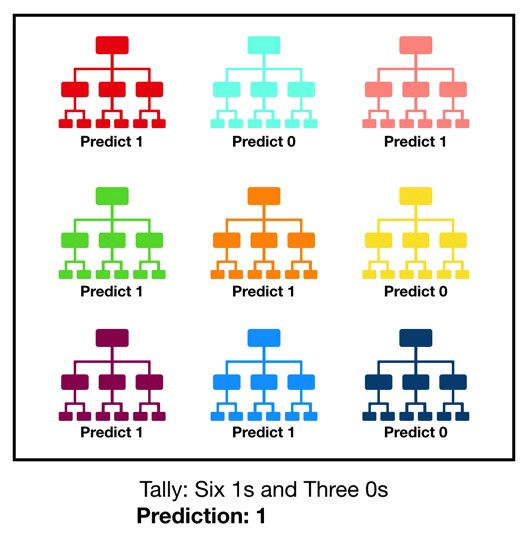

In [108]:
from IPython.display import Image
Image(filename="Random Forest.jpeg") 

### 4.a. Train The Model

In [109]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

### 4.b. Make Predictions

In [110]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [111]:
predictions

array([ 6,  8, 12, 17, 12, 17, 10, 16, 14, 12,  9, 14, 16,  5,  9, 10,  5,
        9, 13,  0, 17, 12,  1, 14,  8, 17, 12, 12, 16, 11,  0, 12,  9,  0,
        1,  1, 17, 14, 14, 15, 12,  8,  6,  9,  6, 12,  6, 12, 12,  0,  1,
       12,  9, 12, 17, 14,  0, 14, 14,  6, 12,  6, 15,  3, 12, 17, 12, 12,
        6,  5, 14, 17,  6,  3, 17,  9, 12, 15,  2, 10,  2, 17,  0, 14, 12,
        5,  3, 17,  3, 12, 10,  5,  9,  9,  0, 14, 14,  6,  0,  8,  0, 12,
        1, 10, 17,  6,  3, 17,  5, 17, 16, 17, 17,  1,  6, 12, 15,  8, 17,
        9,  8,  3,  0, 17,  6,  9, 16, 17, 17,  6, 16, 12, 17, 17, 15, 12,
        1,  9, 12, 17, 12, 17,  6, 12,  6,  0, 12, 12, 17,  9,  1, 17, 14,
       12,  3, 14, 12, 17,  2,  8, 12, 12, 12, 16, 17,  8, 16, 12, 12, 11,
       15, 14, 15, 17,  0,  6, 12, 17,  9, 12,  0,  9,  2, 11, 17, 12,  0,
       12,  0, 12, 17, 12, 12,  8, 16, 17, 15,  9,  3, 17, 17, 14, 12, 16,
       15, 17,  5,  6, 17,  6,  5, 15,  6,  7, 17, 17, 12, 12,  3,  9, 14,
       15,  9, 14,  3])

In [112]:
test_labels

array([ 6, 14, 12, 13, 12,  9, 12,  0, 17, 12, 17,  3,  9, 15, 17, 16,  9,
       15, 17,  0,  9, 12,  0,  8, 14,  4,  4,  1, 15, 17,  0,  0,  3,  3,
       16, 14, 15,  0,  6, 17, 13, 14,  6, 12,  8,  3, 17,  6, 12, 16, 17,
       10, 17, 11,  1,  3,  9,  3, 17,  6,  2,  6, 14,  3, 17, 15, 12, 12,
       17,  2, 17, 11, 17,  8,  9, 17, 10, 17,  2, 10, 10,  4,  9,  3,  0,
        5, 17, 11,  3, 12,  0,  5,  9,  1,  1, 14,  3, 11,  0, 15, 10, 12,
       15, 15, 12, 14,  3, 15,  5, 11,  2, 17, 17, 17,  3,  2, 10,  0, 13,
       17, 15,  6,  2, 15,  3, 14,  2,  3,  9, 14,  0, 12,  6,  2,  1,  0,
        0, 13,  1, 17, 10,  3, 10,  0,  8, 17,  5,  0, 17, 17,  5, 17, 14,
        0,  3,  9, 12, 13, 12, 13, 17,  5,  9, 16,  4,  9, 14,  9,  3, 10,
       10, 17, 15,  9, 12,  6, 10,  4, 13, 12, 13, 17,  9, 17, 12, 10,  0,
       12,  1, 12,  4, 10, 17,  5, 16, 17, 10, 11,  1, 10, 16, 14, 17, 16,
        0,  9, 17,  6,  1, 11, 12,  0, 17, 13,  2,  9, 12,  0,  2, 17, 14,
       17, 17, 11, 14])

## 5.a. Evaluate Model Performance (Accuracy)

In [113]:
# count the errors
errors = predictions - test_labels

In [114]:
errors

array([  0,  -6,   0,   4,   0,   8,  -2,  16,  -3,   0,  -8,  11,   7,
       -10,  -8,  -6,  -4,  -6,  -4,   0,   8,   0,   1,   6,  -6,  13,
         8,  11,   1,  -6,   0,  12,   6,  -3, -15, -13,   2,  14,   8,
        -2,  -1,  -6,   0,  -3,  -2,   9, -11,   6,   0, -16, -16,   2,
        -8,   1,  16,  11,  -9,  11,  -3,   0,  10,   0,   1,   0,  -5,
         2,   0,   0, -11,   3,  -3,   6, -11,  -5,   8,  -8,   2,  -2,
         0,   0,  -8,  13,  -9,  11,  12,   0, -14,   6,   0,   0,  10,
         0,   0,   8,  -1,   0,  11,  -5,   0,  -7, -10,   0, -14,  -5,
         5,  -8,   0,   2,   0,   6,  14,   0,   0, -16,   3,  10,   5,
         8,   4,  -8,  -7,  -3,  -2,   2,   3,  -5,  14,  14,   8,  -8,
        16,   0,  11,  15,  14,  12,   1,  -4,  11,   0,   2,  14,  -4,
        12,  -2, -17,   7,  12,   0,  -8,  -4,   0,   0,  12,   0,   5,
         0,   4, -10,  -5,  -5,   7,   3,   0,  13,  -1,   2,   3,   9,
         1,   5,  -3,   0,   8, -12,   0,   2,  13,  -4,   0, -1

In [115]:
# count the right predictions
right = 0
for i in errors:
    if i == 0:
        right = right + 1
right

49

In [116]:
# count the wrong predictions
wrong = 0
for i in errors:
    if i != 0:
        wrong = wrong + 1
wrong

176

In [117]:
# calculate the model accuracy
acc = right/(right+wrong)
print("Accuracy : ", round(acc*100, 2), "%")

Accuracy :  21.78 %


In [122]:
acc2 = rf.score(test_features, test_labels)
print("Accuracy : ", round(acc2*100, 2), "%")

Accuracy :  21.78 %


## 5.b. Improving Model

In [229]:
data_wo["Type1"].value_counts()

Water       104
Normal       92
Grass        70
Bug          65
Fire         51
Psychic      47
Electric     43
Rock         41
Ground       31
Dark         30
Ghost        28
Poison       28
Dragon       28
Fighting     26
Steel        23
Ice          22
Fairy        15
Flying        4
Name: Type1, dtype: int64

In [230]:
# using the top 3 Pokemon type population
data_wo2 = data_wo[(data_wo["Type1"] == "Water") |
                  (data_wo["Type1"] == "Normal") |
                  (data_wo["Type1"] == "Grass")]
print(data_wo2.head())
print(data_wo2.shape)

   Type1  HP  Atk  Def  SpAtk  SpDef  Speed
0  Grass  45   49   49     65     65     45
1  Grass  60   62   63     80     80     60
2  Grass  80   82   83    100    100     80
3  Grass  80  100  123    122    120     80
9  Water  44   48   65     50     64     43
(266, 7)


In [243]:
### 3.b. Split Data into input (features) and output (labels) variables

# Labels are the values we want to predict
labels = np.array(data_wo2["Type1"])

# Remove the labels from the features
# axis 1 refers to the columns
features = data_wo2.drop("Type1", axis = 1)
# Saving feature names for later use
feature_list = list(data_wo2.columns)
# Convert to numpy array
features = np.array(features)

### 3.c. Dealing with Categorical Label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
#print(le.classes_)
labels_enc = le.transform(labels)

### 3.d. Train Test Split

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels_enc, test_size = 0.40, random_state = 2)

### 4.a. Train The Model

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
# Train the model on training data
rf.fit(train_features, train_labels)

### 4.b. Make Predictions

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

### 4.c. Evaluate Model Performance (Accuracy)

# count the errors
errors = predictions - test_labels

# count the right predictions
right = 0
for i in errors:
    if i == 0:
        right = right + 1
#right

# count the wrong predictions
wrong = 0
for i in errors:
    if i != 0:
        wrong = wrong + 1
#wrong

# calculate the model accuracy
acc = right/(right+wrong)
print("Accuracy : ", round(acc*100, 2), "%")

Accuracy :  50.47 %


In [246]:
print(predictions)
print(test_labels)
print(errors)
print(right, wrong, right+wrong)

[1 0 2 1 2 2 1 2 2 2 2 1 2 0 1 2 0 1 1 2 2 1 1 1 2 1 1 2 2 2 2 1 2 0 1 1 2
 2 2 1 2 0 2 2 1 0 2 1 1 1 0 2 2 0 2 2 2 0 1 2 2 1 0 2 1 1 1 1 2 0 0 1 2 0
 2 2 0 1 2 1 2 2 0 1 2 0 0 2 2 2 2 2 0 2 1 1 1 1 2 0 1 0 2 2 2 2 1]
[2 2 0 1 0 2 1 0 2 0 0 2 1 2 1 2 2 1 1 2 1 1 1 1 0 1 1 0 2 2 1 1 2 0 1 1 1
 2 2 2 2 1 2 2 1 0 1 1 1 1 1 0 1 2 0 2 2 2 1 0 2 0 2 2 2 2 2 2 2 2 2 1 1 2
 1 0 2 1 0 2 2 2 2 1 0 1 2 2 2 2 1 0 2 2 1 1 0 1 0 0 1 0 0 2 2 0 0]
[-1 -2  2  0  2  0  0  2  0  2  2 -1  1 -2  0  0 -2  0  0  0  1  0  0  0
  2  0  0  2  0  0  1  0  0  0  0  0  1  0  0 -1  0 -1  0  0  0  0  1  0
  0  0 -1  2  1 -2  2  0  0 -2  0  2  0  1 -2  0 -1 -1 -1 -1  0 -2 -2  0
  1 -2  1  2 -2  0  2 -1  0  0 -2  0  2 -1 -2  0  0  0  1  2 -2  0  0  0
  1  0  2  0  0  0  2  0  0  2  1]
54 53 107


## 5.c. Variable Importance

In [235]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Def                  Importance: 0.21
Variable: SpDef                Importance: 0.17
Variable: Type1                Importance: 0.16
Variable: HP                   Importance: 0.15
Variable: Atk                  Importance: 0.15
Variable: SpAtk                Importance: 0.15


[None, None, None, None, None, None]

Text(0.5,1,'Variable Importances')

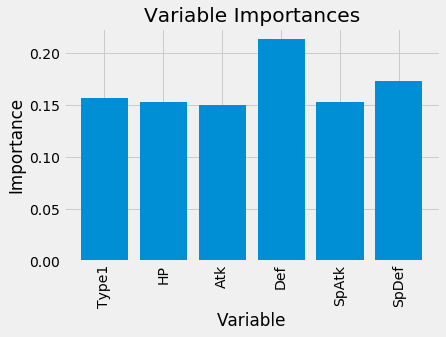

In [236]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

## 6. Extra questions based on curiosity (for more insight)
1. Pokemon Type terbanyak?
2. Pokemon terkuat?
3. Pokemon terlemah?
4. Apakah benar Pokemon type Rock memiliki Defense terbesar?
5. Apakah benar Pokemon type Water memiliki HP terbesar?
6. Apakah benar Pokemon type Psychic memiliki Sp.Atk terbesar?
7. Apakah benar Pokemon type Fighting memiliki Attack terbesar?
8. Pokemon type apa yang memiliki Sp.Def dan Speed terbesar?
9. Apakah Pokemon Legendary adalah Pokemon terkuat di masing-masing Pokemon Type group?

In [32]:
# 1. Pokemon Type terbanyak?
rawdata["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [259]:
# 2. Pokemon terkuat?
rawdata[rawdata["Total"] == rawdata["Total"].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [258]:
# 3. Pokemon terlemah?
rawdata[rawdata["Total"] == rawdata["Total"].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


## 7. Conclusion
1. Model Performance (Accuracy) **buruk (<70%)**.
2. Model buruk mungkin dikarenakan **data input / features** yang **tidak distinctive** antar Label (Pokemon Type) dan jenis Label terlalu banyak (**18 categorical**)
3. Semua Variable dalam model **penting**.

## 8. Next Step / Future Improvement
1. Membuat model lebih baik dengan cara :


- **Data input yang lebih baik**, berkarakter dan distinctive
- Memilih **beberapa feature / kolom** yang penting saja ke dalam model
- Pengelompokan **Top 3 Label + yang lain dikelompokkan ke Others**
- **Pengelompokan data** pada masing-masing feature ke categorical (0 dan 1) dengan nilai 0 di bawah mean, 1 di atas mean


2. Menggunakan **teknik klasifikasi lain** selain Random Forest (?)
3. Membuat jenis **machine learning model yang lain** dengan tujuan yang berbeda